# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [11]:
def cartoonify(image, arguments=0):
    """
    Apply cartoon effect to an image.

    Parameters:
    image (numpy.ndarray): Input image.
    arguments (int): Optional argument for additional customization.

    Returns:
    numpy.ndarray: Cartoonified image.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply median blur to reduce noise
    gray_blur = cv2.medianBlur(gray, 1)
    
    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, blockSize=5, C=5)
    
    # Apply bilateral filter to smoothen the image while preserving edges
    color = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Combine the edge mask with the smoothened image
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    
    return cartoon

In [24]:
import cv2
import numpy as np

def pencilSketch(image, arguments=0):
    """
    Apply pencil sketch effect to an image.

    Parameters:
    image (numpy.ndarray): Input image.
    arguments (int): Optional argument for additional customization.

    Returns:
    numpy.ndarray: Pencil sketch image with 3 color channels.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    

    # Invert the grayscale image
    inverted_gray = 255 - gray
    
    # Apply Gaussian blur to the inverted image
    blurred = cv2.GaussianBlur(inverted_gray, (21, 21), sigmaX=0, sigmaY=0)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, blockSize=5, C=7)
    
    # Invert the blurred image
    inverted_blurred = 255 - blurred
    
    # Blend the grayscale image with the inverted blurred image using a color dodge blend
    pencil_sketch = cv2.divide(gray, inverted_blurred, scale=256.0)
    pencil_sketch = cv2.multiply(pencil_sketch, edges, scale=1/255.0)

    
    # Convert the single-channel pencil sketch image to a 3-channel image
    pencil_sketch_3d = cv2.cvtColor(pencil_sketch, cv2.COLOR_GRAY2BGR)

    
    return pencil_sketch_3d

In [25]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)
cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

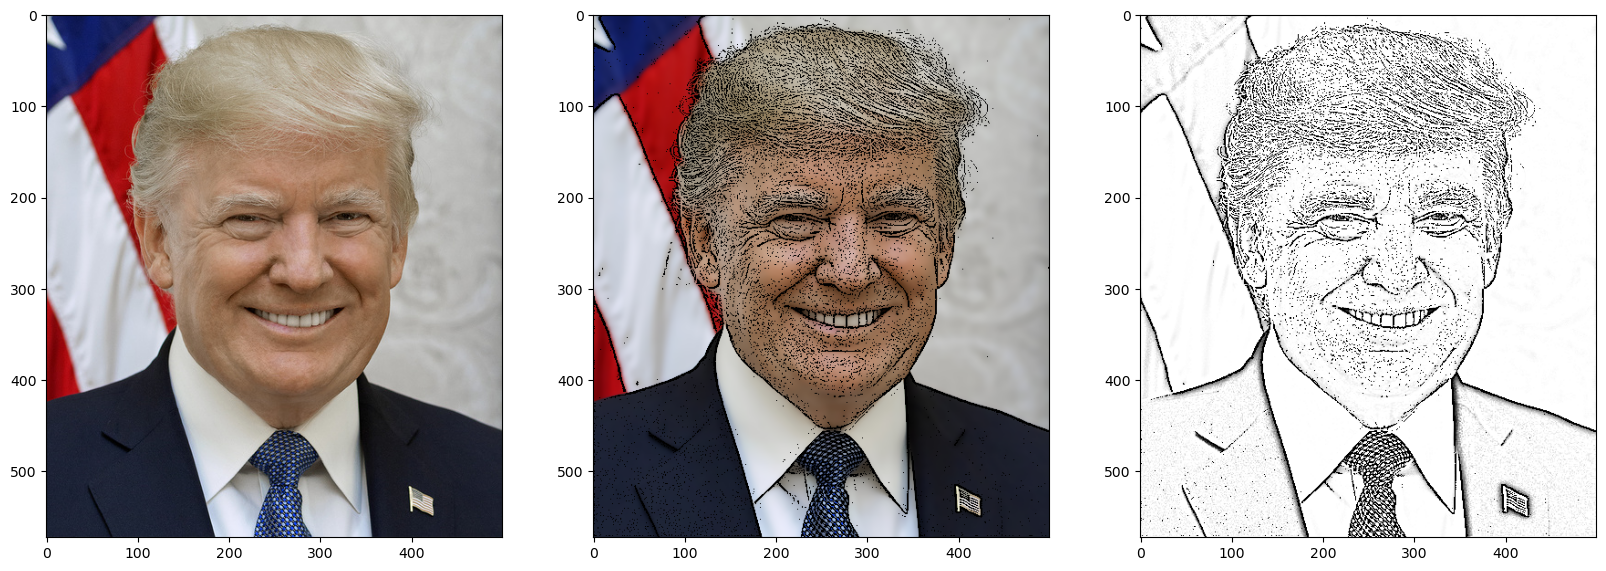

In [26]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage[:,:,::-1]);

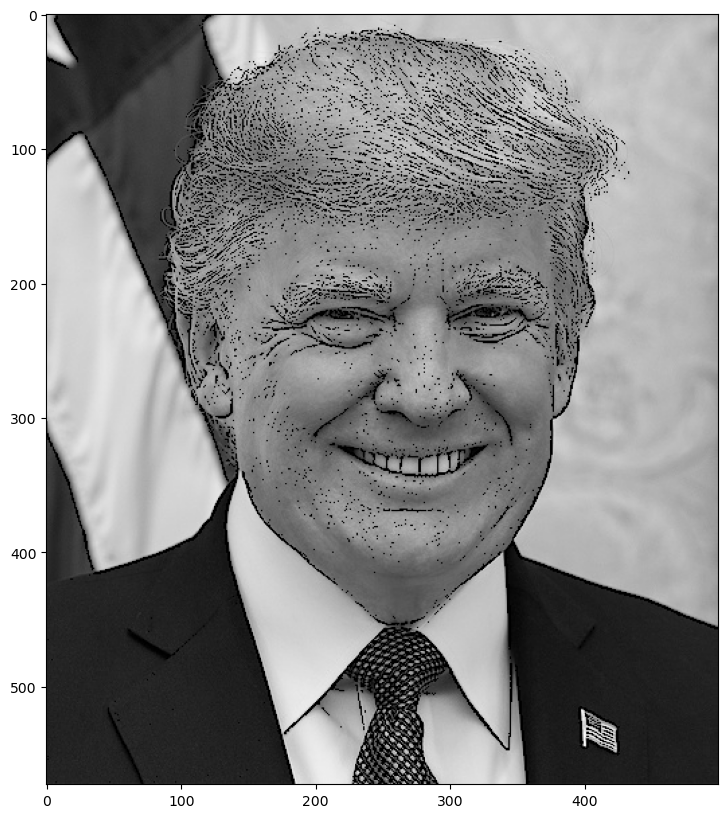

In [15]:

def pencilSketch(image, arguments=0):
    """
    Apply pencil sketch effect to an image using a gradient-based technique with Laplacian.

    Parameters:
    image (numpy.ndarray): Input image.
    arguments (int): Optional argument for additional customization.

    Returns:
    numpy.ndarray: Pencil sketch image with 3 color channels.
    """
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    
    
    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, blockSize=5, C=9)
    
    # Apply Gaussian blur to the inverted image
    blurred = cv2.GaussianBlur(edges, (5, 5), 0)
    
   
    
    # Blend the grayscale image with the inverted blurred image using a color dodge blend
    pencil_sketch = cv2.divide(gray_image, edges, scale=256.0)

    
     
    # Display the original and pencil sketch images
    cv2.imshow("Gray Image", gray_image)
    cv2.imshow("edges Image", edges)
    cv2.imshow("Blurred Image", blurred)
    # cv2.imshow("Inverted blurred Image", inverted_blurred)
    cv2.imshow(" Image", pencil_sketch)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Convert the single-channel pencil sketch image to a 3-channel image
    pencil_sketch_3d = cv2.cvtColor(pencil_sketch, cv2.COLOR_GRAY2BGR)
    
    return pencil_sketch_3d


imagePath = "trump.jpg"
image = cv2.imread(imagePath)
pencil_sketch_image = pencilSketch(image)
plt.imshow(pencil_sketch_image[:,:,::-1]);

# More filters

In [16]:
# sepia effect
def sepia(image):
    """
    Apply sepia effect to an image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    numpy.ndarray: Sepia image.
    """
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    sepia_image = cv2.transform(image, sepia_filter)
    sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)
    
    return sepia_image

# negative effect
def negative(image):
    """
    Apply negative effect to an image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    numpy.ndarray: Negative image.
    """
    negative_image = 255 - image
    return negative_image


# Emboss effect
def emboss(image):
    """
    Apply emboss effect to an image.

    Parameters:
    image (numpy.ndarray): Input image.

    Returns:
    numpy.ndarray: Embossed image.
    """
    kernel = np.array([[ -2, -1, 0],
                       [ -1,  1, 1],
                       [  0,  1, 2]])
    embossed_image = cv2.filter2D(image, -1, kernel)
    embossed_image = cv2.cvtColor(embossed_image, cv2.COLOR_BGR2GRAY)
    embossed_image = cv2.cvtColor(embossed_image, cv2.COLOR_GRAY2BGR)
    
    return embossed_image

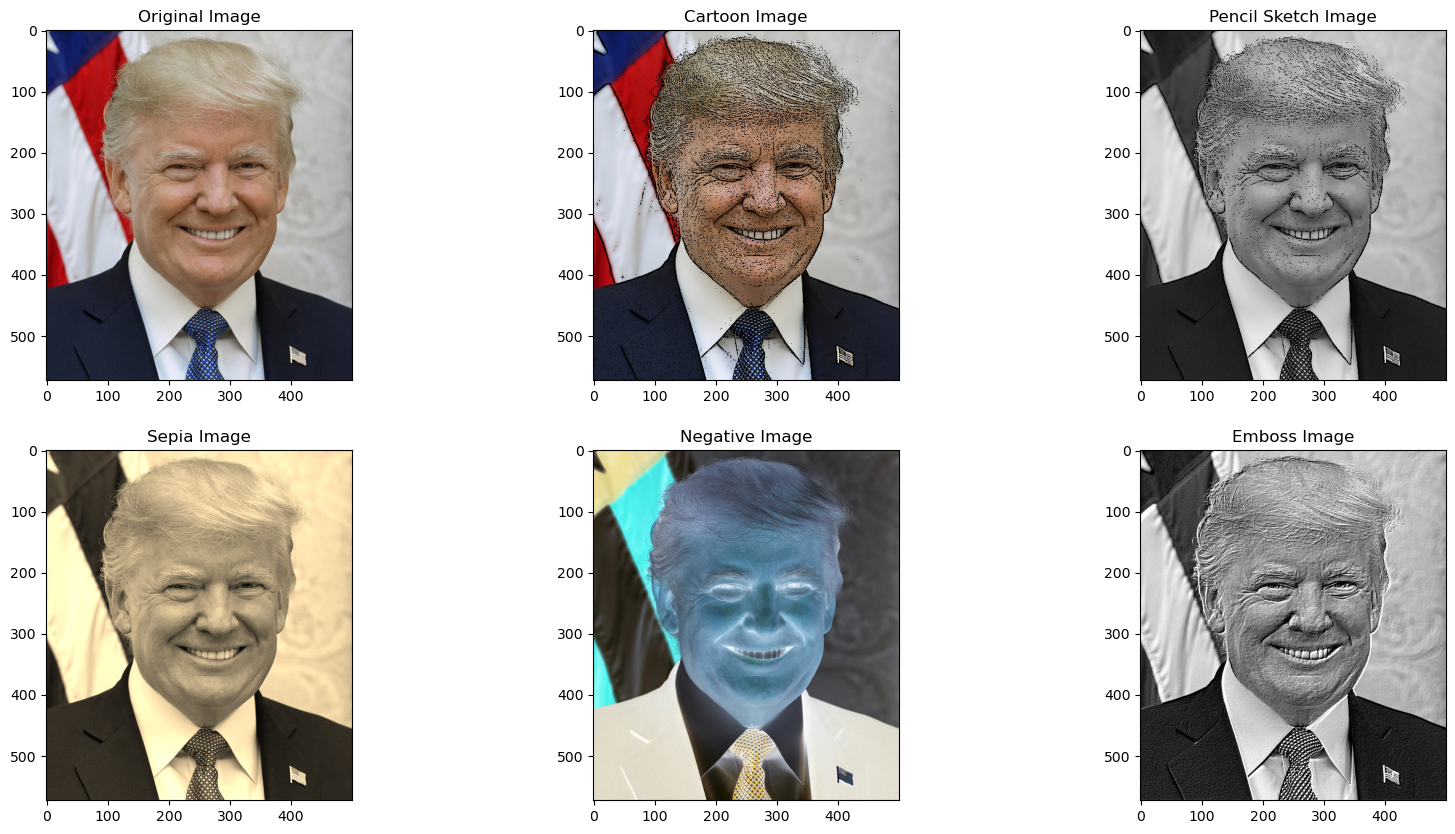

In [17]:
import matplotlib.pyplot as plt

# Load the image
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

# Apply filters
cartoon_image = cartoonify(image)
pencil_sketch_image = pencilSketch(image)
sepia_image = sepia(image)
negative_image = negative(image)
emboss_image = emboss(image)

# Display the images
plt.figure(figsize=[20, 10])

plt.subplot(231); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(232); plt.imshow(cv2.cvtColor(cartoon_image, cv2.COLOR_BGR2RGB)); plt.title("Cartoon Image")
plt.subplot(233); plt.imshow(cv2.cvtColor(pencil_sketch_image, cv2.COLOR_BGR2RGB)); plt.title("Pencil Sketch Image")
plt.subplot(234); plt.imshow(cv2.cvtColor(sepia_image, cv2.COLOR_BGR2RGB)); plt.title("Sepia Image")
plt.subplot(235); plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB)); plt.title("Negative Image")
plt.subplot(236); plt.imshow(cv2.cvtColor(emboss_image, cv2.COLOR_BGR2RGB)); plt.title("Emboss Image")

plt.show()